In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [49]:
dataFrame = pd.read_excel("merc.xlsx")

In [50]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [51]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [52]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\Ozge\AppData\Local\Temp\ipykernel_23940\3910111562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

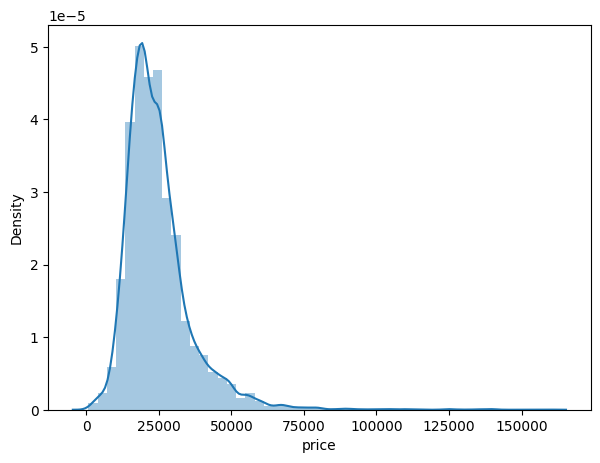

In [53]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])
##sbn.displot(dataFrame["price"], kde=True)
##sbn.histplot(dataFrame["price"], kde=True)

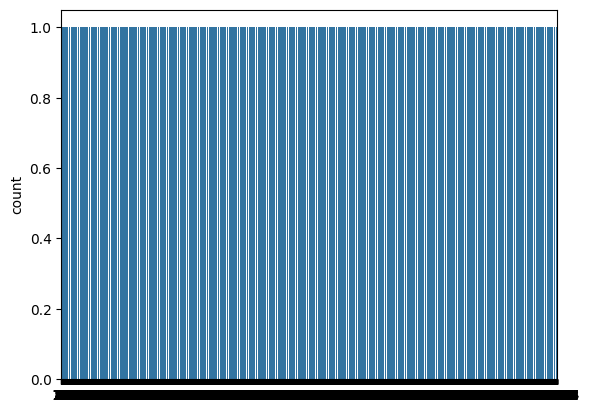

In [54]:
sbn.countplot(dataFrame["year"])
plt.show()

In [55]:
print(dataFrame.dtypes)

year              int64
price             int64
transmission     object
mileage           int64
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [56]:
numeric_df = dataFrame.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.520712 -0.738027  0.012480 -0.094626   -0.142147
price       0.520712  1.000000 -0.537214  0.268717 -0.438445    0.516126
mileage    -0.738027 -0.537214  1.000000 -0.160223  0.202850    0.063652
tax         0.012480  0.268717 -0.160223  1.000000 -0.513742    0.338341
mpg        -0.094626 -0.438445  0.202850 -0.513742  1.000000   -0.339862
engineSize -0.142147  0.516126  0.063652  0.338341 -0.339862    1.000000


In [57]:
dataFrame.corr()["price"].sort_values()

ValueError: could not convert string to float: 'Automatic'

In [58]:
print(dataFrame["price"].dtype)

int64


In [59]:
dataFrame["price"] = pd.to_numeric(dataFrame["price"], errors='coerce')


In [60]:
dataFrame = dataFrame.dropna(subset=["price"])

In [61]:
dataFrame.corr()["price"].sort_values()
print(correlation_matrix)

ValueError: could not convert string to float: 'Automatic'

In [62]:
# Veri setinde sayısal olmayan değerleri arayın
non_numeric_data = dataFrame.applymap(lambda x: isinstance(x, str))
print(dataFrame[non_numeric_data.any(axis=1)])


       year  price transmission  mileage  tax   mpg  engineSize
0      2005   5200    Automatic    63000  325  32.1         1.8
1      2017  34948    Automatic    27000   20  61.4         2.1
2      2016  49948    Automatic     6200  555  28.0         5.5
3      2016  61948    Automatic    16000  325  30.4         4.0
4      2016  73948    Automatic     4000  325  30.1         4.0
...     ...    ...          ...      ...  ...   ...         ...
13114  2020  35999    Automatic      500  145  55.4         2.0
13115  2020  24699    Automatic     2500  145  55.4         2.0
13116  2019  30999    Automatic    11612  145  41.5         2.1
13117  2019  37990    Automatic     2426  145  45.6         2.0
13118  2019  54999    Automatic     2075  145  52.3         2.9

[13119 rows x 7 columns]


C:\Users\Ozge\AppData\Local\Temp\ipykernel_23940\1023573834.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_data = dataFrame.applymap(lambda x: isinstance(x, str))
